In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [2]:
x = np.array([0.03751155, 0.05001541, 0.06251926, 0.07502311, 0.08752696,
        0.10003081, 0.11253466, 0.12503851, 0.13754236, 0.15004622,
       0.16255007, 0.17505392, 0.18755777, 0.20006162, 0.21256547,
       0.22506932, 0.23757318, 0.25007703, 0.26258088, 0.27508473,
       0.28758858, 0.30009243])
y = np.array([0.17091544, 0.2196002 , 0.24884891, 0.22784447, 0.365201,
       0.37375478, 0.39257039, 0.37231073, 0.41550739, 0.43636989,
       0.45111672, 0.46662792, 0.48854647, 0.49640163, 0.51887196,
       0.52827061, 0.54437941, 0.54929705, 0.56552202, 0.57508514,
      0.58477563, 0.59755615])

In [28]:
def model(x, a, b):
    return a * np.sqrt(x) + b

In [34]:
def residuals_factory(model, x, y):
    def wrapped(p):
        return y - model(x, *p)
    return wrapped

In [35]:
residuals = residuals_factory(model, x, y)

In [36]:
popt, pcov = optimize.curve_fit(model, x, y)
popt

array([ 1.18540589, -0.0354023 ])

In [39]:
optimize.least_squares(residuals, x0=[1, 1], loss="cauchy")

 active_mask: array([0., 0.])
        cost: 0.005294195739168844
         fun: array([-0.02328416, -0.01011524, -0.01215659, -0.06144941,  0.04989328,
        0.03423396,  0.03030813, -0.01146092,  0.01127752,  0.01259242,
        0.00859055,  0.00606132,  0.01057303,  0.00159254,  0.00774561,
        0.00130026,  0.00199939, -0.00809218, -0.00650564, -0.01123638,
       -0.01551841, -0.01640983])
        grad: array([-1.16582188e-10, -6.38378239e-16])
         jac: array([[-0.19352156, -0.99918718],
       [-0.22360693, -0.99984654],
       [-0.2499831 , -0.99977836],
       [-0.27235741, -0.99435548],
       [-0.29474737, -0.99627449],
       [-0.31572108, -0.99824394],
       [-0.33500003, -0.99862328],
       [-0.35353819, -0.99980299],
       [-0.37079629, -0.99980925],
       [-0.38726587, -0.99976218],
       [-0.40313036, -0.99988931],
       [-0.4183714 , -0.99994489],
       [-0.43300679, -0.99983233],
       [-0.44728078, -0.9999962 ],
       [-0.46100674, -0.99991001],
    

In [30]:
xlin = np.linspace(0, x.max(), 200)

In [31]:
yhat = model(xlin, *popt)

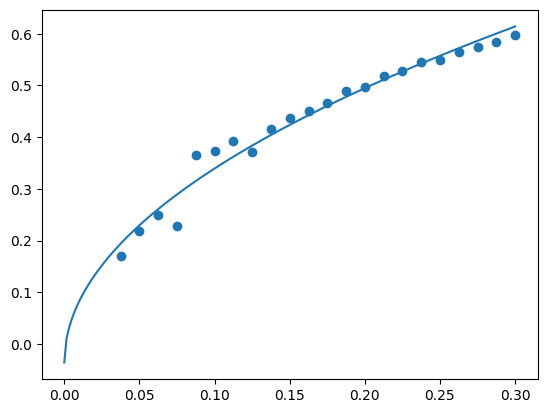

In [32]:
fig, axe = plt.subplots()
axe.scatter(x, y)
axe.plot(xlin, yhat)